<span style="color:##4E5C71">

# Death Registration in Ontario

   Data Link: https://open.canada.ca/data/en/dataset/04bb62a9-bd7a-4f2d-bb42-a27c620b1f68

   Creator: Audrana Esho

This data set contains the calculated deaths in Ontario, it is broken down by municipality, year and month. The CSV file has data starting from the year 1980, the data in total has 79944 lines. My analysis will determine which month has the highest death counts, and which municipality has the most popular death rate. We will then explore which year is popular as well.

## My hypothesis
 
- Month being the highest in death count will be December, due to my theory of people having seasonal depression which may lead to higher suicide rates. 

- Municipality being the highest in death count will be Toronto since it is the biggest city in Ontario, which relates to its population rate.


<span style="color:##4E5C71">

# Importing Data
    
Here I have imported the data from my device, I will be using seaborn, numpy and pandas.
    

In [1]:
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import pandas as pd
pd.set_option('display.max_rows',1000)

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [5]:
deaths = pd.read_csv('/Users/Audrana/Desktop/death.csv')

<span style="color:##4E5C71">


# How the Data Looks
    

This is how the data looks like, it is broken down into 4 major columns: Year, Month, Municipality, Total
    
Total is the amount of registered deaths calculated by the municipality.
    

In [6]:
deaths.head(21)

,Year,Month,Municipality,Totals
0,1980,Apr,AJAX,9
1,1980,Apr,ALLISTON,7
2,1980,Apr,ANCASTER,6
3,1980,Apr,AYLMER,7
4,1980,Apr,BANCROFT,7
5,1980,Apr,BARRIE,11
6,1980,Apr,BELLEVILLE,25
7,1980,Apr,BRACEBRIDGE,9
8,1980,Apr,BRAMPTON,36
9,1980,Apr,BRANTFORD,46


<span style="color:##4E5C71">

# Cleaning Months 
    
I believe that December will have the highest death rate, we will determine if my hypothesis is correct.
    
To determine which month has the highest deaths per month, we need to clean the data first. I created a new data frame named deathcounts. 
    
I grouped this by Months to determine the **SIZE** of each group. We can see here that each month has 6300-7400 results inputed. Getting a understanding of how much data is presented before diving in.
    

In [7]:
deathsize = deaths.groupby('Month').size().to_frame() 
deathsize.columns = ['Total']
deathsize

,Total
Month,
Apr,6593
Aug,6366
Dec,7037
Feb,6618
Jan,7309
Jul,6416
Jun,6295
Mar,7142
May,6552


<span style="color:##4E5C71">


## Months Sum
Now we break it down to the exact **SUM** of total deaths. Using the original deaths table, I can make a new data frame named deathsum.

There is also another formula to re index the Months to be in order by months.

In [8]:
deathsum = deaths.groupby('Month')['Totals'].agg(['sum'])
deathsum = deathsum.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
deathsum

,sum
Month,
Jan,284803
Feb,247237
Mar,268889
Apr,241915
May,241352
Jun,224973
Jul,231442
Aug,228545
Sep,225135


<span style="color:##4E5C71">


### Months Sum Plot
I also created a bar plot showcasing the dataset, here we can see the SUM of deaths, highest being January.
    
Using the previous data and this bar plot, we have verified that my hypothesis is wrong.

<AxesSubplot:xlabel='Month', ylabel='sum'>

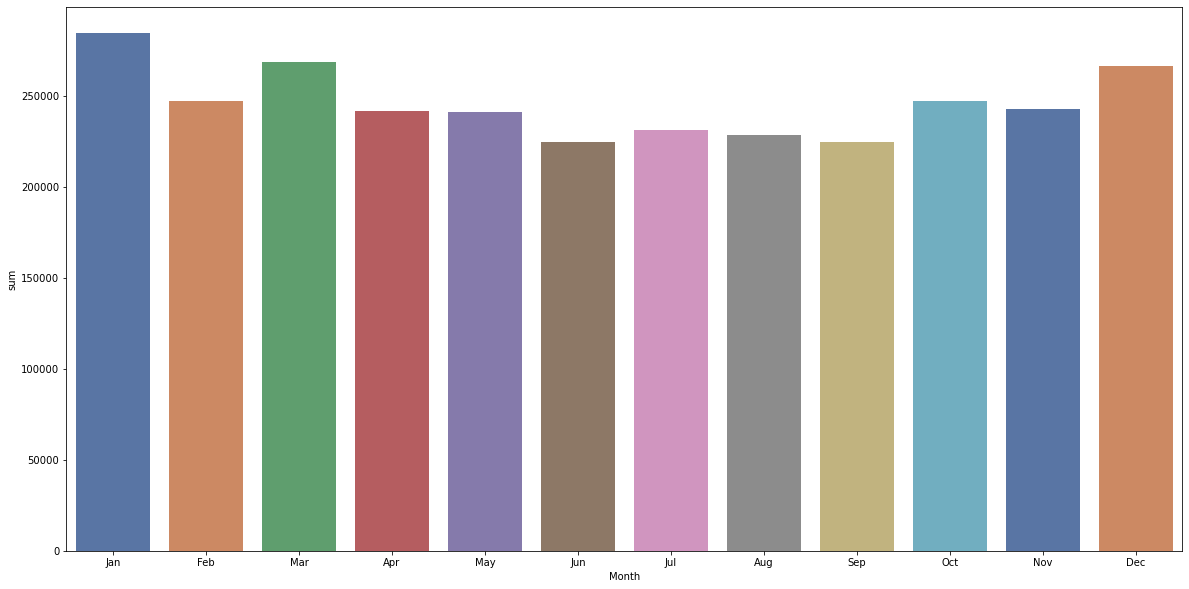

In [9]:
plt.figure(figsize=(20,10))
sns.barplot(data=deathsum, x=deathsum.index, 
            y='sum', palette='deep')

<span style="color:##4E5C71">
    
## Months Mean
This table we get the average of deaths per month.
    
There is also another formula to reindex the Months to be in order by months.
    
On average, we once again see January being the highest deaths. 
    

In [10]:
deathmean = deaths.groupby('Month')['Totals'].agg(['mean'])
deathmean = deathmean.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
deathmean

#fix mean, get rid of groupby for months

,mean
Month,
Jan,38.966069
Feb,37.358265
Mar,37.648978
Apr,36.692704
May,36.836386
Jun,35.738364
Jul,36.072631
Aug,35.900880
Sep,35.667776


<span style="color:##4E5C71">
    
### Months Mean Scatterplot
    
Here we have a visual representation of the average of deaths per month. We can see in the summer from June - August there was a lower average in comparison to the other months. 

<AxesSubplot:xlabel='Month', ylabel='mean'>

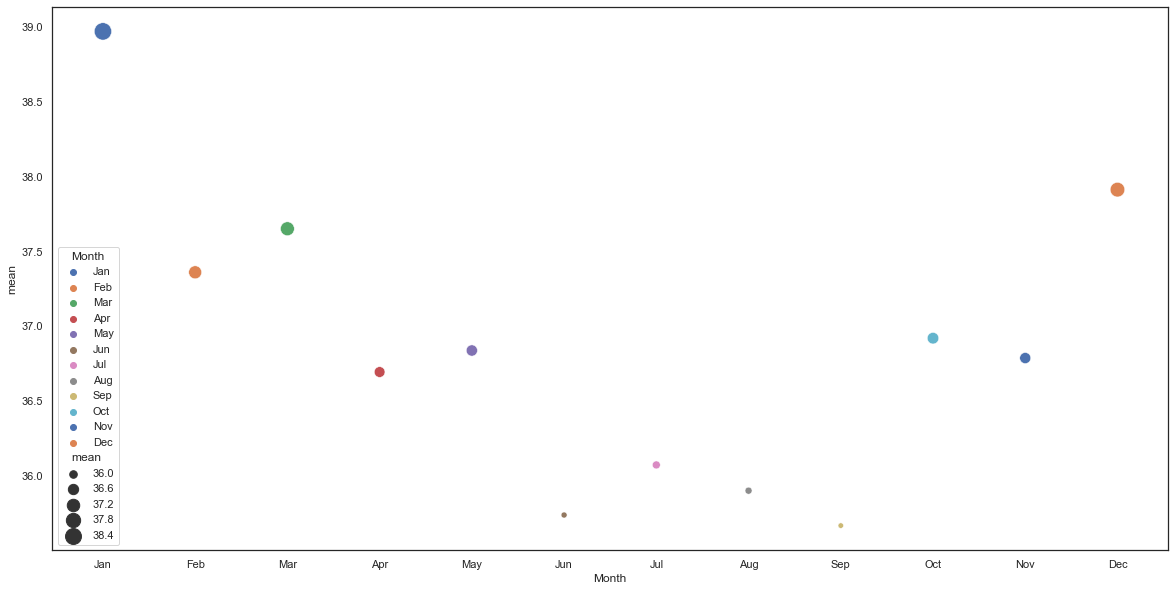

In [11]:
plt.figure(figsize=(20,10))
sns.set_theme(style='white',color_codes=True)
sns.scatterplot(data=deathmean, 
                x=deathmean.index, y='mean', 
                hue='Month', palette='deep',size='mean',sizes=(30,300))

<span style="color:##4E5C71">
    
## Months Min/Max
Now for some exploratory data, here I collected the minimum amount of deaths and the maximum amount of deaths per month.
    
Once again, I have reindexed the months to be in order.
    
    
Fun Fact: January may have the highest amount of deaths in total, but April has the highest maximum amount of deaths, a total of 2314 for April in comparison to January which is 2008. 

In [12]:
deathmin = deaths.groupby('Month')['Totals'].agg(['min'])
deathmin = deathmin.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
deathmin

,min
Month,
Jan,6
Feb,6
Mar,6
Apr,6
May,6
Jun,6
Jul,6
Aug,6
Sep,6


In [13]:
deathmax = deaths.groupby('Month')['Totals'].agg(['max'])
deathmax = deathmax.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
deathmax

,max
Month,
Jan,2008
Feb,1725
Mar,1673
Apr,2314
May,1939
Jun,1525
Jul,1481
Aug,1418
Sep,1405


<span style="color:##4E5C71">

# Cleaning Municipality

I believe that Toronto will have the highest death count. We will determine if my hypothesis is correct.
    
To determine which municipality has the highest deaths, we need to clean the data first. I created a new data frame named municipalitycount. 
    
I grouped this by Municipality to determine the **SIZE** of each group. We can see here that each municipality has 1-800 results inputed. Getting a understanding of how much data is presented before diving in.

In [14]:
municipalitycount = deaths.groupby('Municipality').size().to_frame() 
municipalitycount.columns = ['Total']
municipalitycount

,Total
Municipality,
ACTON,68
ADDINGTON HIGHLANDS,10
ADELAIDE,17
ADJALA-TOSORONTIO,7
ADMASTON-BROMLEY,1
AILSA CRAIG,16
AJAX,490
AKWESASNE,1
AKWESASNE MOHAWK TERRITORY,1


In [15]:
area = deaths

<span style="color:##4E5C71">

##  Municipality Sum
Here we look at the total **SUM** of deaths per municipality. By grouping together Municipalities and calculating the SUM of Total Deaths.
    
With this data set, we can see that Toronto has the highest death counts, followed by: Ottawa, Hamilton, London, Mississauga.

In [16]:
areasum = area.groupby('Municipality').sum()['Totals'].to_frame()
areasum = areasum.sort_values('Totals',ascending=False)
areasum

,Totals
Municipality,
TORONTO,465068
OTTAWA,146915
HAMILTON,129918
LONDON,103179
MISSISSAUGA,100336
WINDSOR,75341
NORTH YORK,69453
SCARBOROUGH,65473
BRAMPTON,55834


<span style="color:##4E5C71">

## Municipality Mean
Here we get an average understanding of each Municipality, average monthly deaths
    
I grouped it by Municipality, and calculated the **MEAN** of the totals. 

In [17]:
areamean = area.groupby('Municipality').mean()['Totals'].to_frame() 
areamean = areamean.sort_values('Totals',ascending=False)
areamean

,Totals
Municipality,
TORONTO,939.531313
OTTAWA,296.797980
HAMILTON,262.460606
LONDON,208.442424
MISSISSAUGA,202.698990
SCARBOROUGH,173.668435
NORTH YORK,166.155502
WINDSOR,152.204040
NOT RECORDED,150.727273


<span style="color:##4E5C71">

## Municipality Comparison
Comparison between major cities in Ontario
    
I will be taking the 5 top cities to get a better understanding of the data.
    
We have determined that Toronto has the highest death, which does verify my hypothesis but I want to compare it to other locations as well. 

In [18]:
municipalitycompairson = deaths.loc[(deaths['Municipality']=='TORONTO' ) | 
                                    (deaths['Municipality']=='OTTAWA') | 
                                    (deaths['Municipality']=='HAMILTON') | 
                                    (deaths['Municipality']=='LONDON') | 
                                    (deaths['Municipality']=='MISSISSAUGA')]
municipalitycompairson

,Year,Month,Municipality,Totals
36,1980,Apr,HAMILTON,222
51,1980,Apr,LONDON,149
56,1980,Apr,MISSISSAUGA,76
72,1980,Apr,OTTAWA,199
102,1980,Apr,TORONTO,445
...,...,...,...,...
79824,2021,Mar,HAMILTON,431
79847,2021,Mar,LONDON,254
79856,2021,Mar,MISSISSAUGA,303
79874,2021,Mar,OTTAWA,457


<span style="color:##4E5C71">

### Municipality Comparison Plot
    
    
On this plot, I compared the top 5 major cities and their Total of deaths per year.

<AxesSubplot:xlabel='Year', ylabel='Totals'>

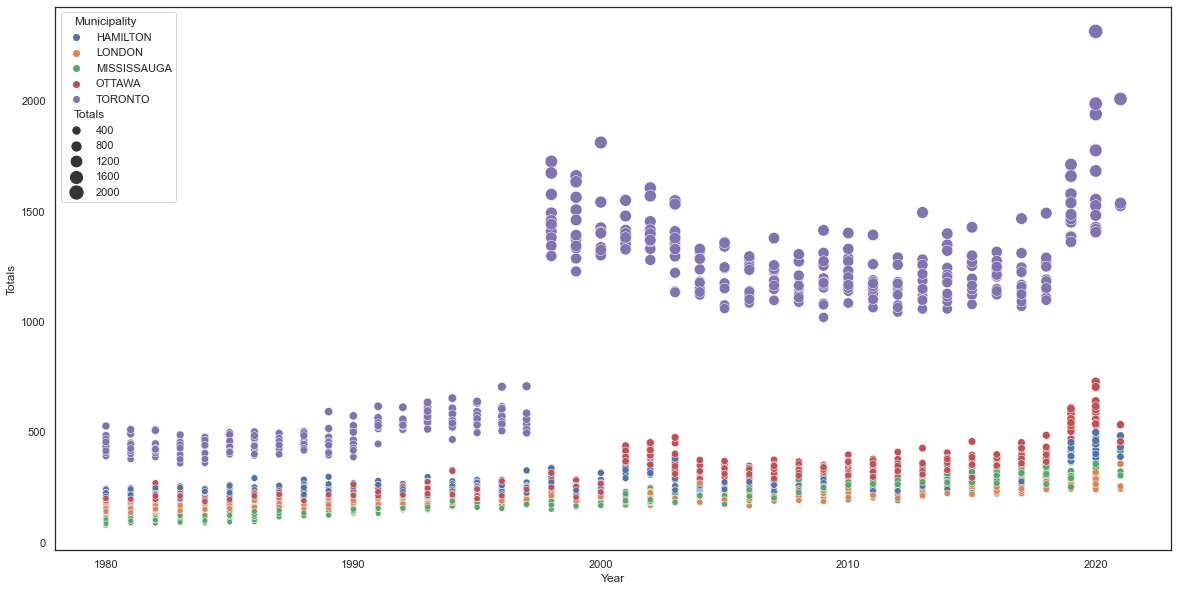

In [19]:
plt.figure(figsize=(20,10))
sns.set_theme(style='white',color_codes=True)
sns.scatterplot(data=municipalitycompairson, 
                x='Year', y='Totals',
                hue='Municipality', palette='deep',size='Totals',sizes=(30,200))

<span style="color:##4E5C71">

# Cleaning Year

Here we explore exploratory data comparing years and total deaths. Here is what the data looks like.

In [20]:
yearcount = deaths.groupby('Year').sum()
yearcount

,Totals
Year,
1980,52405
1981,52585
1982,53254
1983,54134
1984,54496
1985,56229
1986,57489
1987,57975
1988,60555


<span style="color:##4E5C71">

## Year Comparison
Using a line plot, we see the steady increase through out 1980 to 2020. Big jump on all the months in 1990-2000 and 2019-2020. 

<AxesSubplot:xlabel='Year', ylabel='Totals'>

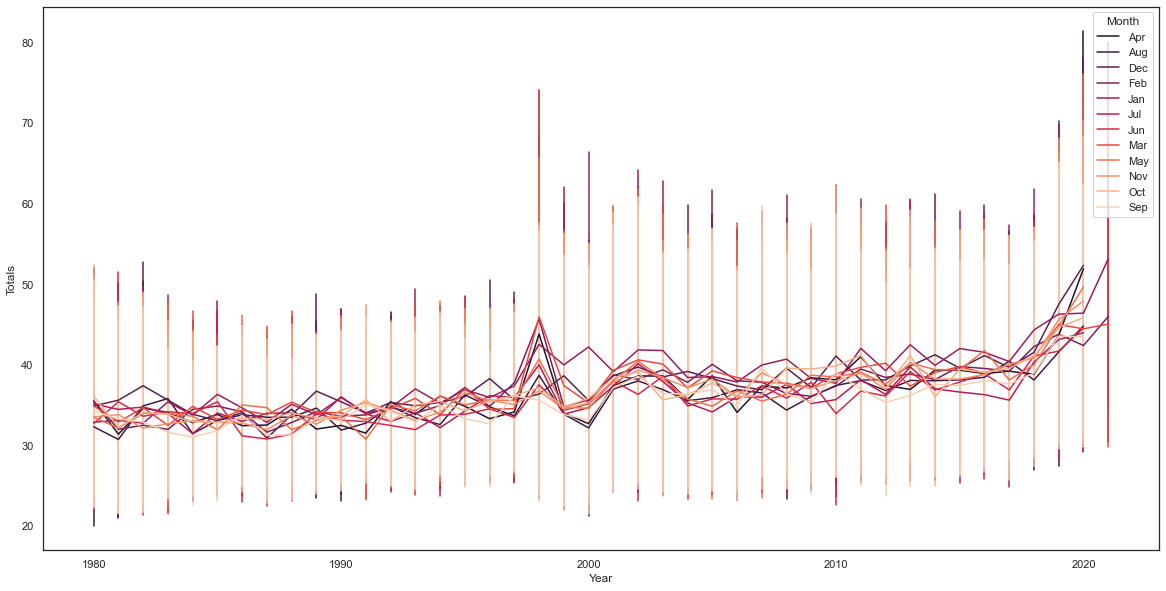

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(data=deaths, x='Year', y='Totals', 
             hue='Month', err_style='bars', palette='rocket')

<span style="color:##4E5C71">

# Conclusion

Based on my analysis we have answered the following, 
    
**FALSE**: Month being the highest in death count will be December, due to my theory of people having seasonal depression which may lead to higher suicide rates. 

**TRUE**: Municipality being the highest in death count will be Toronto since it is the biggest city in Ontario, which relates to its population rate.

    
Some other issues that could have a major influence
- Some cities were newer then most
- Some cities boundaries change or split up, specifically their zoning. 
- We don't know the population for each Municipality per year. Unable to figure out a trend line for the next 10 years.
